# Hand of God Code 2.0 
## Hanan Basheer (20B030018)

### Importing required libraries

In [189]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import seaborn as sns
import pandas as pd
import csv
import serial
import time
import keyboard
import mouse
import warnings
warnings.filterwarnings('ignore')

### Training Data extractor from csv file

In [190]:
def built(hand):
    l = []
    l1 = []
    for i in range(1, len(hand)):
       l = l + [[hand[i][0], hand[i][1], hand[i][2], hand[i][3]]]
       l1 = l1 + [[hand[i][4]]]
    return (np.array(l, dtype=list), np.array(l1, dtype=list))

def unique_action(y):
    l = []
    for i in y:
        if i[0] not in l:
            l.append(i[0])
    return l

reader = list(csv.reader(open(os.getcwd() + '\\Vol-Ges.csv')))
x, y = built(reader)
actions = unique_action(y)
print("List of actions stored:", actions)

List of actions stored: ['Yo', 'Anti-Yo', 'Closed Hand', 'Open Hand', 'Victory', 'Pointer']


### Creating Linear regression model and its methods

In [191]:
model = LogisticRegression(solver = 'liblinear', C = 1, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

### Prediction functions and Testing prediction

In [192]:
# Single gesture prediction function
def predict(x):
    y = []
    for i in range(len(x)):
        y.append(model.predict([x[i]]))
    return np.array(y)

# Array buider of prediction for creating confusion matrix
def predict_array(x, y_test):
    y = []
    z = list(predict(x))
    for i in range(y_test.shape[0]):
        y += z
    return np.array(y)

#testing case
y_pred = predict(x)

### Confusion-matrix of stored data and heat map visualization of hand gesture database

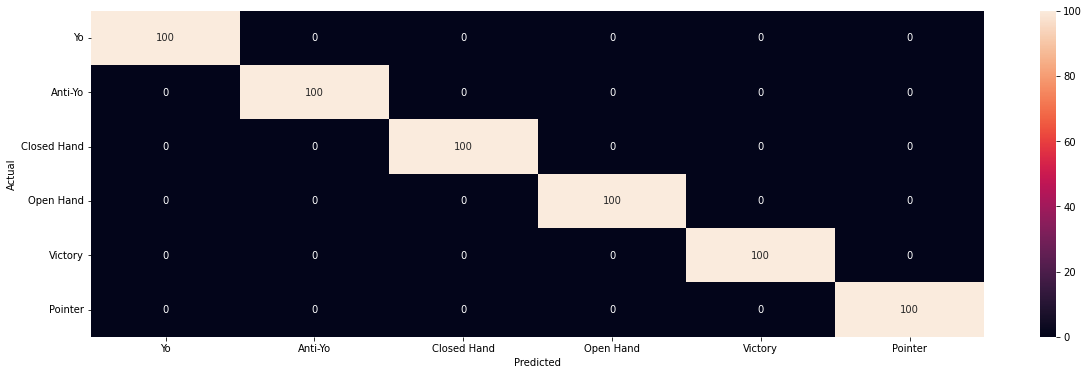

In [193]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = actions, yticklabels = actions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Confusion-matrix of test case

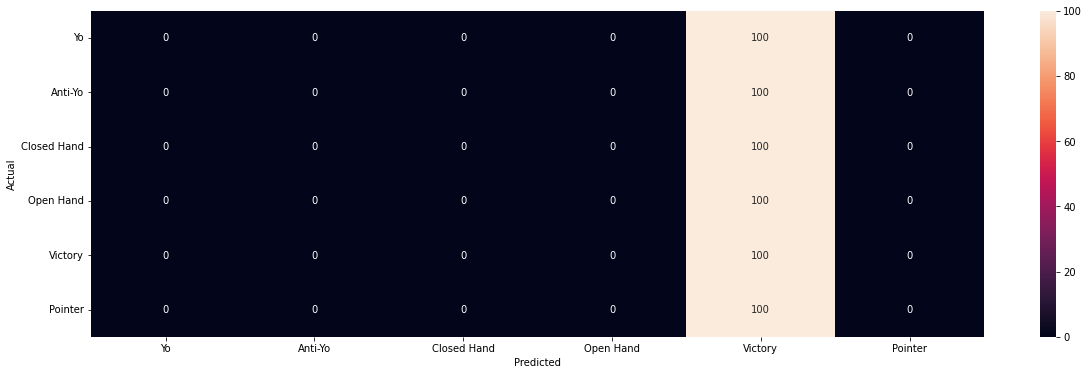

In [194]:
x_trial = [[0, 1, 2, 3]]  # Voltage matrix corresponding to Victory-like Gesture
cm = confusion_matrix(y, predict_array(x_trial, y))

fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = actions, yticklabels = actions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Classification report and Accuracies of model

In [195]:
print("Learning score: ", model.score(x_train, y_train))
print("Predictive score: ", model.score(x_test, y_test))
print("Classification Report: ")
print(classification_report(y, y_pred))

Learning score:  1.0
Predictive score:  1.0
Classification Report: 
              precision    recall  f1-score   support

     Anti-Yo       1.00      1.00      1.00       100
 Closed Hand       1.00      1.00      1.00       100
   Open Hand       1.00      1.00      1.00       100
     Pointer       1.00      1.00      1.00       100
     Victory       1.00      1.00      1.00       100
          Yo       1.00      1.00      1.00       100

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

